In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, ConfusionMatrixDisplay, roc_curve, auc
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [7]:
df = pd.read_csv('neo.csv')
df2 = pd.read_csv('neo_v2.csv')

In [8]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [9]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [10]:
df2.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [13]:
df.compare(df2)
##oba pliki są identyczne

Empty DataFrame
Columns: []
Index: []

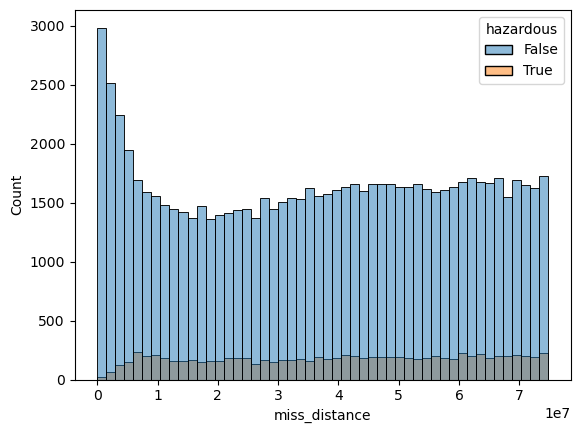

In [14]:
# wykresy por zagrożenie (hazardous) a inne zmienne 
sns.histplot(x=df['miss_distance'], hue=df['hazardous'], bins=50);

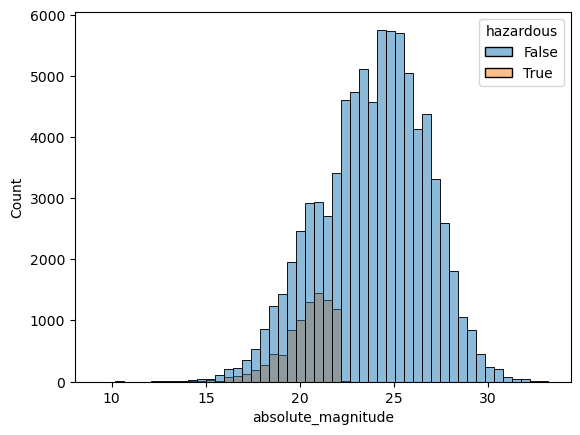

In [15]:
sns.histplot(x=df['absolute_magnitude'], hue=df['hazardous'], bins=50);

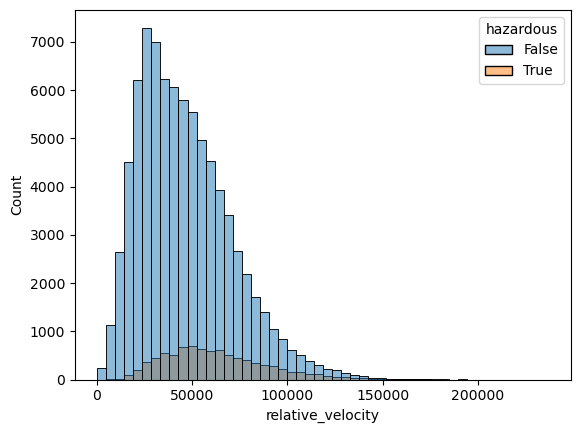

In [16]:
sns.histplot(x=df['relative_velocity'], hue=df['hazardous'], bins=50);

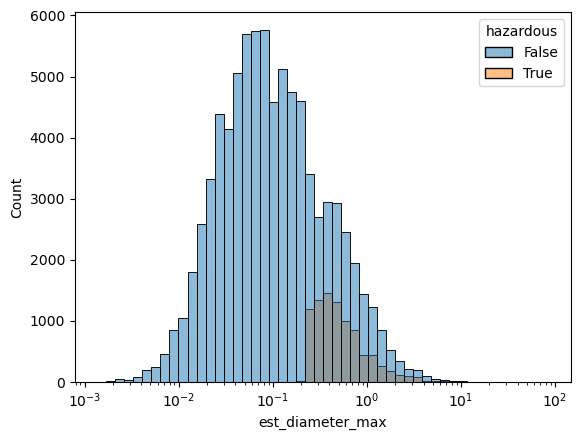

In [17]:
sns.histplot(x=df['est_diameter_max'], hue=df['hazardous'], bins=50, log_scale=True);

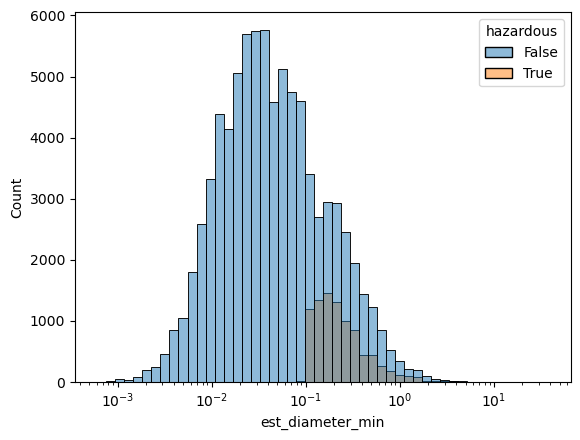

In [18]:
sns.histplot(x=df['est_diameter_min'], hue=df['hazardous'], bins=50, log_scale=True);

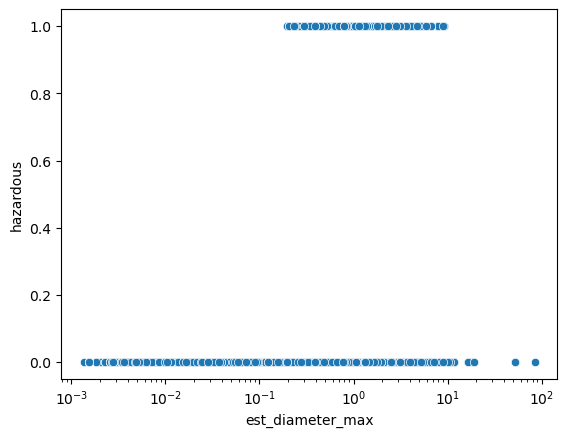

In [19]:
sns.scatterplot(x=df['est_diameter_max'], y=df['hazardous'])
plt.xscale('log')

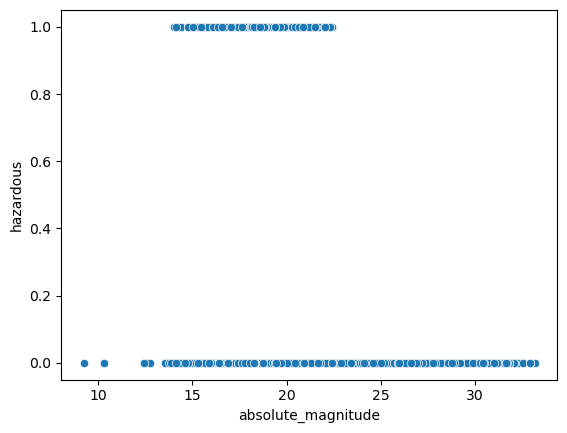

In [20]:
sns.scatterplot(x=df['absolute_magnitude'], y=df['hazardous']);

<AxesSubplot:>

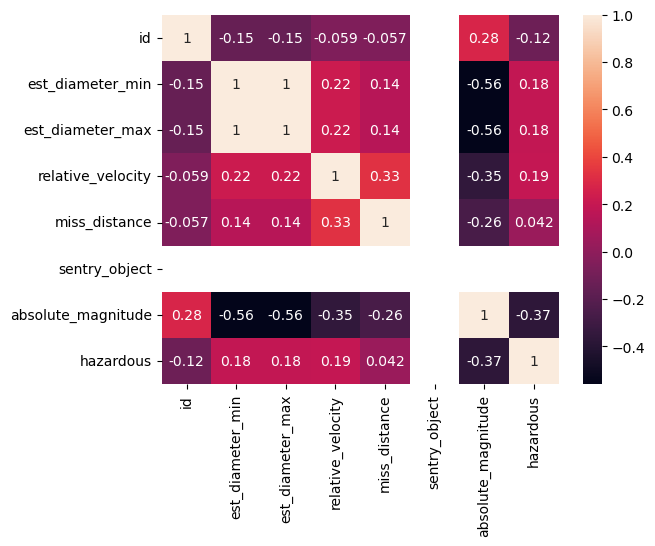

In [21]:
# korelcaje zmiędzy zmiennymi
# z est_diameter_min i est_diameter_max robimy średnią i zamieniamy te dwie zmienne na jedną nową 
sns.heatmap(df.corr(), annot=True)

In [22]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [23]:
df['est_diameter_avg'] = (df['est_diameter_max'] + df['est_diameter_min']) / 2
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.412613
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False,0.043007
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False,0.027136
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False,0.051706
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False,0.011845


In [24]:
# uzuwamy niepotrzebne kolumny
X = df.drop(columns=['est_diameter_min', 'est_diameter_max', 'id', 'name', 'orbiting_body', 'sentry_object', 'hazardous'], axis=1)

In [25]:
X

,relative_velocity,miss_distance,absolute_magnitude,est_diameter_avg
0,13569.249224,5.483974e+07,16.73,1.938843
1,73588.726663,6.143813e+07,20.00,0.430073
2,114258.692129,4.979872e+07,17.83,1.168268
3,24764.303138,2.543497e+07,22.20,0.156150
4,42737.733765,4.627557e+07,20.09,0.412613
...,...,...,...,...
90831,52078.886692,1.230039e+07,25.00,0.043007
90832,46114.605073,5.432121e+07,26.00,0.027136
90833,7566.807732,2.840077e+07,24.60,0.051706
90834,69199.154484,6.869206e+07,27.80,0.011845


In [26]:
y = df['hazardous']
y

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

In [27]:
# standaryzacja ze względu na duże różnice z wielkości liczb 
cols = ['relative_velocity', 'miss_distance', 'absolute_magnitude', 'est_diameter_avg']
std_scale = preprocessing.StandardScaler().fit(X[cols])
df_std = std_scale.transform(X[cols])

In [28]:
df_std

array([[-1.36391312,  0.79515317, -2.34863167,  3.58728394],
       [ 1.00903999,  1.09035748, -1.21873486,  0.46352912],
       [ 2.61698337,  0.56962356, -1.96854406,  1.9918872 ],
       ...,
       [-1.60122795, -0.38769729,  0.37072244, -0.31984203],
       [ 0.83549218,  1.41489044,  1.47643186, -0.4023702 ],
       [-0.83194291,  1.01582267,  0.20486602, -0.29335902]])

In [29]:
scaled_features_df = pd.DataFrame(df_std, index=df.index, columns=cols)

In [30]:
scaled_features_df

,relative_velocity,miss_distance,absolute_magnitude,est_diameter_avg
0,-1.363913,0.795153,-2.348632,3.587284
1,1.009040,1.090357,-1.218735,0.463529
2,2.616983,0.569624,-1.968544,1.991887
3,-0.921301,-0.520384,-0.458560,-0.103601
4,-0.210697,0.412001,-1.187637,0.427378
...,...,...,...,...
90831,0.158619,-1.108010,0.508936,-0.337852
90832,-0.077187,0.771954,0.854470,-0.370713
90833,-1.601228,-0.387697,0.370722,-0.319842
90834,0.835492,1.414890,1.476432,-0.402370


In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, y, test_size=0.2, random_state=0)

# Regresja logistyczna

In [32]:
lr = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.predict_proba(X_test)

array([[9.96944274e-01, 3.05572573e-03],
       [1.98048544e-01, 8.01951456e-01],
       [9.99370972e-01, 6.29028114e-04],
       ...,
       [8.97949415e-01, 1.02050585e-01],
       [5.22170381e-01, 4.77829619e-01],
       [7.97683978e-01, 2.02316022e-01]])

In [33]:
print("Accuracy:", metrics.accuracy_score(y_test.to_numpy(), y_pred))
print("Precision:", metrics.precision_score(y_test.to_numpy(), y_pred))
print("Recall:", metrics.recall_score(y_test.to_numpy(), y_pred))
print("F1 score:", metrics.f1_score(y_test.to_numpy(), y_pred))
print("Fbeta score:", metrics.fbeta_score(y_test.to_numpy(), y_pred, beta=1))

Accuracy: 0.7899053280493175
Precision: 0.3116616989567809
Recall: 0.932033426183844
F1 score: 0.4671227139466704
Fbeta score: 0.4671227139466704


In [34]:
metrics.confusion_matrix(y_test.to_numpy(), y_pred)

array([[12678,  3695],
       [  122,  1673]], dtype=int64)

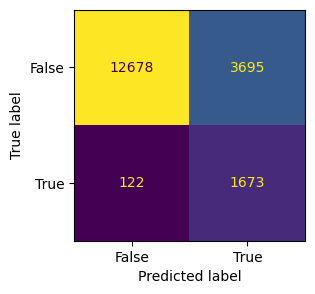

In [104]:
# "przegapiamy" 122 groźne asteroidy
fig, ax = plt.subplots(figsize=(5, 3))
cm = ConfusionMatrixDisplay.from_estimator(
    lr, X_test, y_test, ax=ax, colorbar=False)

In [36]:
y_score_lr = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_lr, pos_label=1)
roc_auc = auc(fpr, tpr)

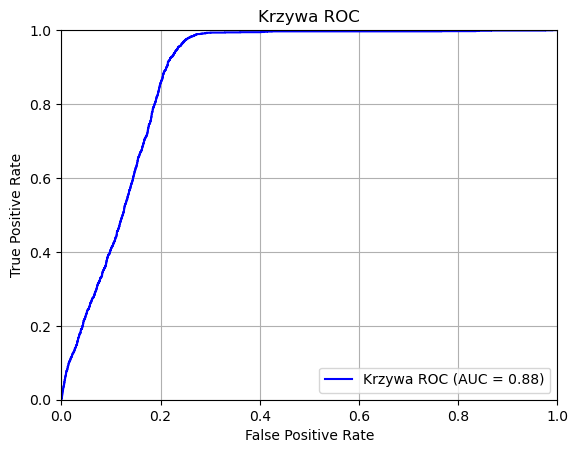

In [37]:
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

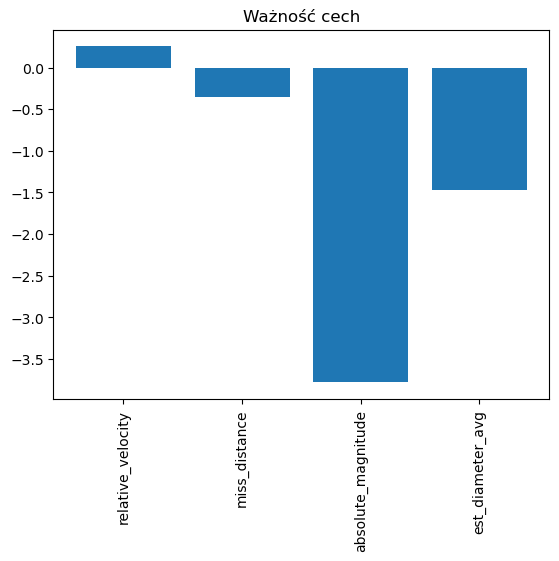

In [38]:
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
plt.title("Ważność cech")
plt.xticks(range(len(lr.coef_[0])), X_train.columns, rotation=90)
plt.show()

# Drzewo decyzyjne

In [39]:
dtc = DecisionTreeClassifier(random_state=0)

In [40]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
y_pred_dtc = dtc.predict(X_test)

### podstawowe drzewo decyzyjne daje słabe wyniki

In [42]:
print("Accuracy:", metrics.accuracy_score(y_test.to_numpy(), y_pred_dtc))
print("Precision:", metrics.precision_score(y_test.to_numpy(), y_pred_dtc))
print("Recall:", metrics.recall_score(y_test.to_numpy(), y_pred_dtc))
print("F1 score:", metrics.f1_score(y_test.to_numpy(), y_pred_dtc))

Accuracy: 0.8930537208278292
Precision: 0.45870535714285715
Recall: 0.45793871866295266
F1 score: 0.4583217173125174


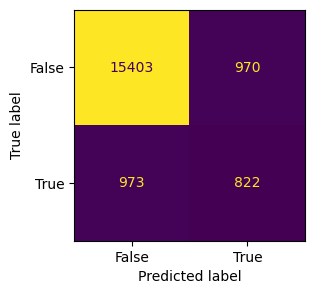

In [101]:
#ConfusionMatrixDisplay.from_estimator(
    # dtc, X_test, y_test)
fig, ax = plt.subplots(figsize=(5, 3))
cm = ConfusionMatrixDisplay.from_estimator(
    dtc, X_test, y_test, ax=ax, colorbar=False)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# Utworzenie klasyfikatora Random Forest
rfc = RandomForestClassifier(random_state=0, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [96]:
y_pred_rfc = rfc.predict(X_test)

In [97]:
print("Accuracy:", metrics.accuracy_score(y_test.to_numpy(), y_pred_rfc))
print("Precision:", metrics.precision_score(y_test.to_numpy(), y_pred_rfc))
print("Recall:", metrics.recall_score(y_test.to_numpy(), y_pred_rfc))
print("F1 score:", metrics.f1_score(y_test.to_numpy(), y_pred_rfc))

Accuracy: 0.9171620431527961
Precision: 0.6467611336032388
Recall: 0.35598885793871865
F1 score: 0.45921667265540783


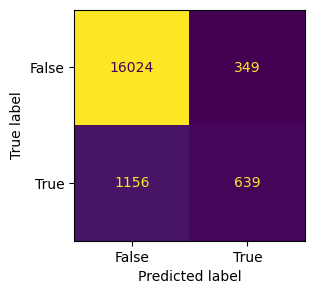

In [99]:
fig, ax = plt.subplots(figsize=(5, 3))
cm = ConfusionMatrixDisplay.from_estimator(
    rfc, X_test, y_test, ax=ax, colorbar=False)

In [44]:
y_score_dtc = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_dtc, pos_label=1)
roc_auc = auc(fpr, tpr)

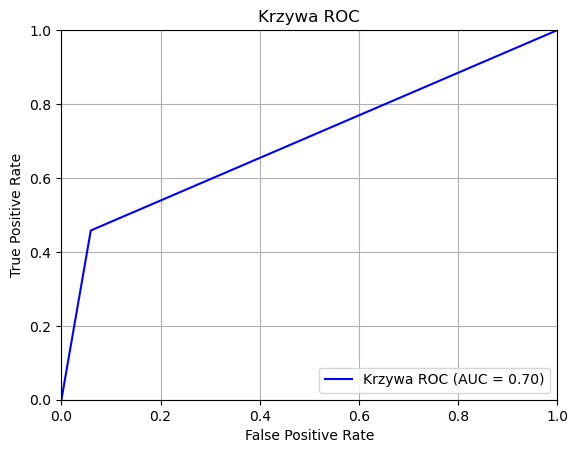

In [45]:
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

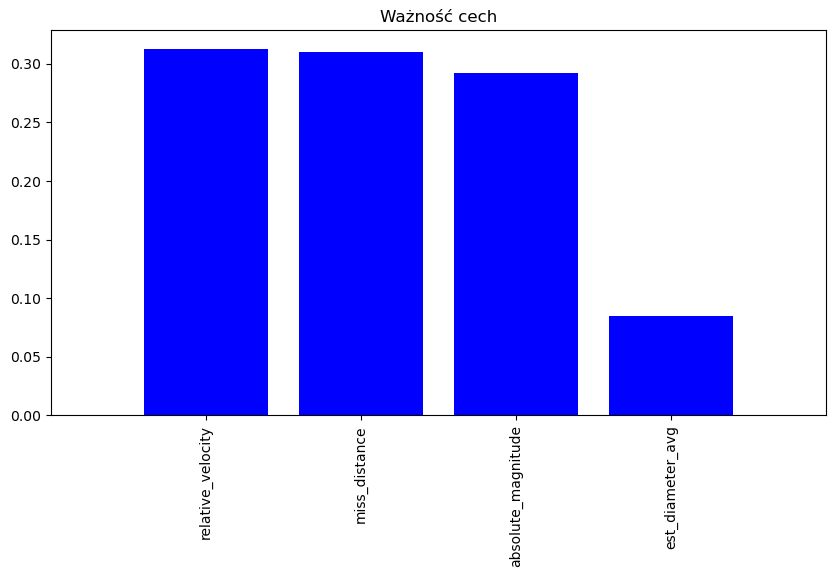

In [46]:
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X.columns)
plt.figure(figsize=(10,5))
plt.title("Ważność cech")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90, fontsize=10)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [47]:
dtc_balanced = DecisionTreeClassifier(random_state=0, class_weight='balanced').fit(X_train, y_train)

In [48]:
y_pred_dtc_bal = dtc_balanced.predict(X_test)

### dodanie class_weight = 'balanced' do modelu nie poprawia sytuacji

In [49]:
print("Accuracy:", metrics.accuracy_score(y_test.to_numpy(), y_pred_dtc_bal))
print("Precision:", metrics.precision_score(y_test.to_numpy(), y_pred_dtc_bal))
print("Recall:", metrics.recall_score(y_test.to_numpy(), y_pred_dtc_bal))
print("F1 score:", metrics.f1_score(y_test.to_numpy(), y_pred_dtc_bal))

Accuracy: 0.8985579040070454
Precision: 0.48579881656804735
Recall: 0.4573816155988858
F1 score: 0.4711621233859397


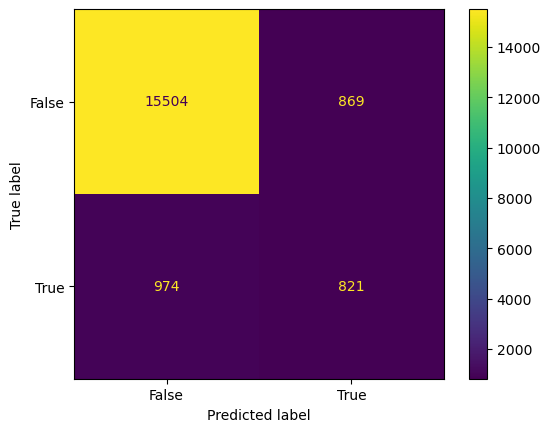

In [50]:
ConfusionMatrixDisplay.from_estimator(
     dtc_balanced, X_test, y_test)

In [51]:
y_score_dtc_balanced = dtc_balanced.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_dtc_balanced, pos_label=1)
roc_auc = auc(fpr, tpr)

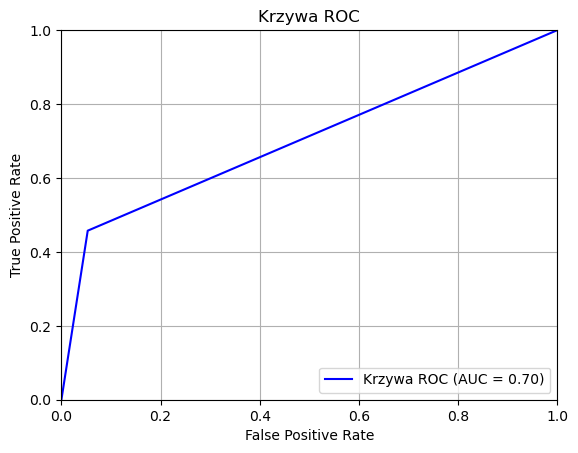

In [52]:
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

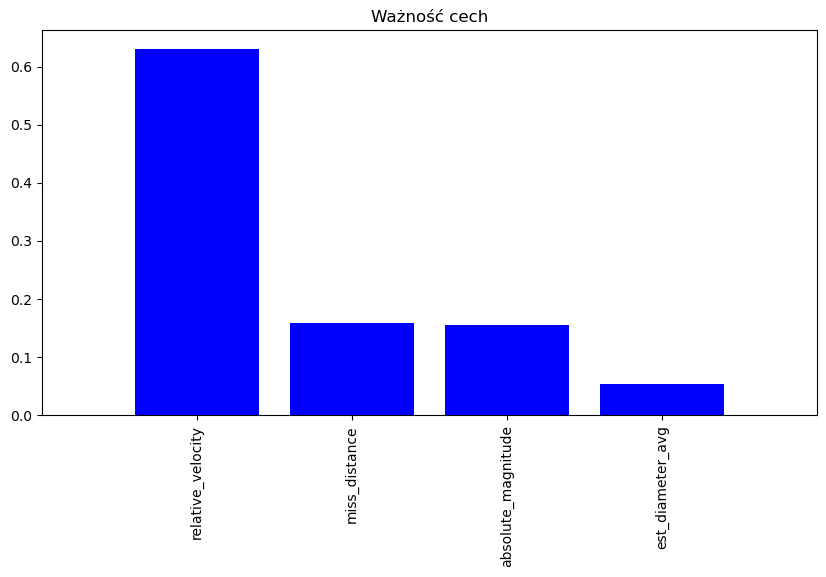

In [53]:
importances = dtc_balanced.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X.columns)
plt.figure(figsize=(10,5))
plt.title("Ważność cech")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90, fontsize=10)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# zastosowanie hyperopta

In [54]:
def objective(params):
    clf = DecisionTreeClassifier(**params, random_state=0, class_weight='balanced')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = recall_score(y_test, y_pred, pos_label=1)
    return {'loss': -score, 'status': STATUS_OK}

In [55]:
space = {
    'max_depth': hp.choice('max_depth', range(1,100)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 200)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 200))
}

In [56]:
trials = Trials()

best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|██████████| 100/100 [00:22<00:00,  4.39trial/s, best loss: -0.9933147632311977]


In [57]:
print("Najlepsze wyniki:", best)

Najlepsze wyniki: {'max_depth': 0, 'min_samples_leaf': 4, 'min_samples_split': 52}


In [58]:
clf_hyperopt = DecisionTreeClassifier(max_depth=best['max_depth']+1, min_samples_split=best['min_samples_split']+2, min_samples_leaf=best['min_samples_leaf']+1, random_state=0, class_weight='balanced').fit(X_train, y_train)

In [59]:
y_pred_dtc_hyperopt = clf_hyperopt.predict(X_test)

### zastosowanie hyperopta w celu maksymalizacji recall daje wynik bliski 1, jednak kosztem bardzo niskiego precision

In [60]:
print("Accuracy:", metrics.accuracy_score(y_test.to_numpy(), y_pred_dtc_hyperopt))
print("Precision:", metrics.precision_score(y_test.to_numpy(), y_pred_dtc_hyperopt))
print("Recall:", metrics.recall_score(y_test.to_numpy(), y_pred_dtc_hyperopt))
print("F1 score:", metrics.f1_score(y_test.to_numpy(), y_pred_dtc_hyperopt))

Accuracy: 0.7779062087186261
Precision: 0.30709610747502586
Recall: 0.9933147632311977
F1 score: 0.4691487962110249


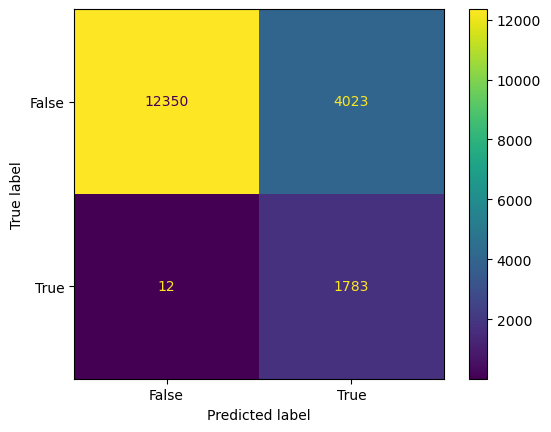

In [61]:
ConfusionMatrixDisplay.from_estimator(
    clf_hyperopt, X_test, y_test)

In [62]:
y_score_clf_hyperopt = clf_hyperopt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_clf_hyperopt, pos_label=1)
roc_auc = auc(fpr, tpr)

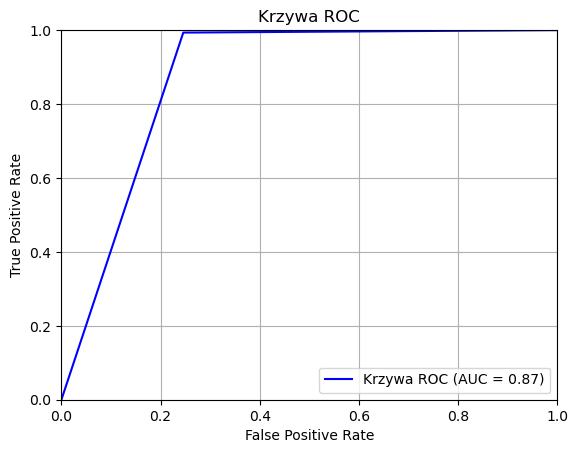

In [63]:
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

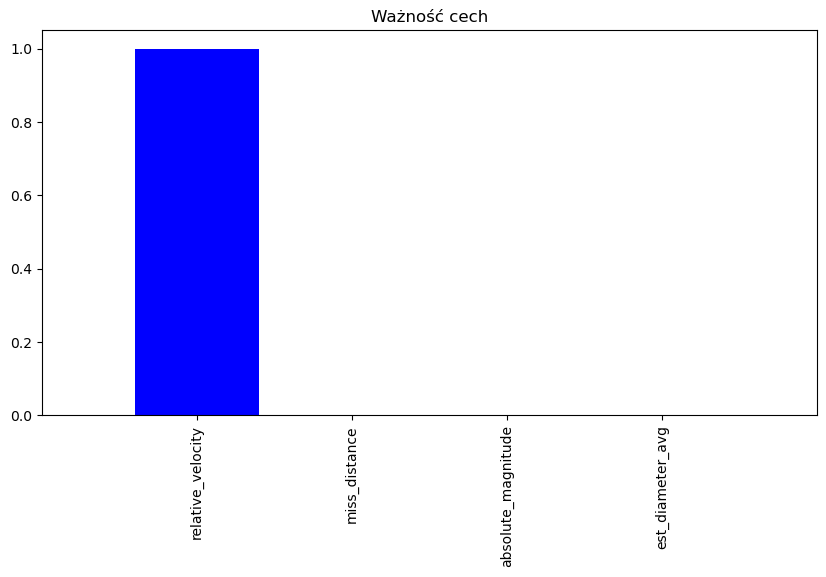

In [64]:
importances = clf_hyperopt.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X.columns)
plt.figure(figsize=(10,5))
plt.title("Ważność cech")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90, fontsize=10)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# maksymalizacja względem f1_score

In [65]:
def objective_f1(params):
    clf = DecisionTreeClassifier(**params, random_state=0, class_weight='balanced')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = metrics.f1_score(y_test, y_pred, pos_label=1)
    return {'loss': -score, 'status': STATUS_OK}

In [66]:
trials = Trials()

best_f1 = fmin(objective_f1, space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|██████████| 100/100 [00:25<00:00,  3.97trial/s, best loss: -0.5035993740219092]


In [67]:
print("Najlepsze wyniki:", best_f1)

Najlepsze wyniki: {'max_depth': 52, 'min_samples_leaf': 10, 'min_samples_split': 77}


In [68]:
clf_hyperopt_f1 = DecisionTreeClassifier(max_depth=best_f1['max_depth']+1, min_samples_split=best_f1['min_samples_split']+2, min_samples_leaf=best_f1['min_samples_leaf']+1, random_state=0, class_weight='balanced').fit(X_train, y_train)

In [69]:
y_pred_dtc_hyperopt_f1 = clf_hyperopt_f1.predict(X_test)

In [70]:
print("Accuracy:", metrics.accuracy_score(y_test.to_numpy(), y_pred_dtc_hyperopt_f1))
print("Precision:", metrics.precision_score(y_test.to_numpy(), y_pred_dtc_hyperopt_f1))
print("Recall:", metrics.recall_score(y_test.to_numpy(), y_pred_dtc_hyperopt_f1))
print("F1 score:", metrics.f1_score(y_test.to_numpy(), y_pred_dtc_hyperopt_f1))

Accuracy: 0.825407309555262
Precision: 0.3501632208922742
Recall: 0.8963788300835654
F1 score: 0.5035993740219092


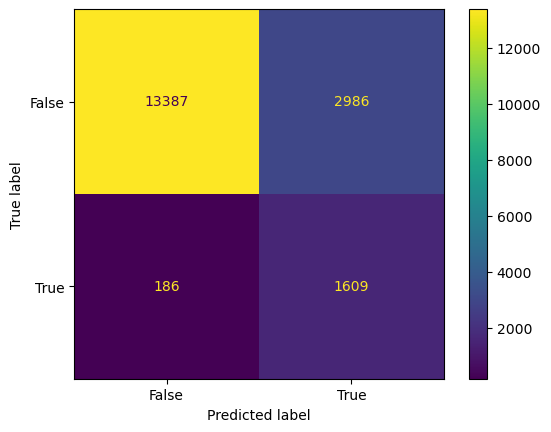

In [71]:
ConfusionMatrixDisplay.from_estimator(
    clf_hyperopt_f1, X_test, y_test)

In [72]:
y_score_clf_hyperopt_f1 = clf_hyperopt_f1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_clf_hyperopt_f1, pos_label=1)
roc_auc = auc(fpr, tpr)

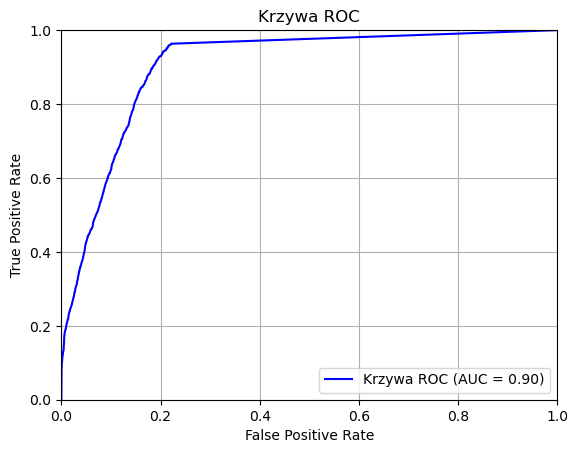

In [73]:
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

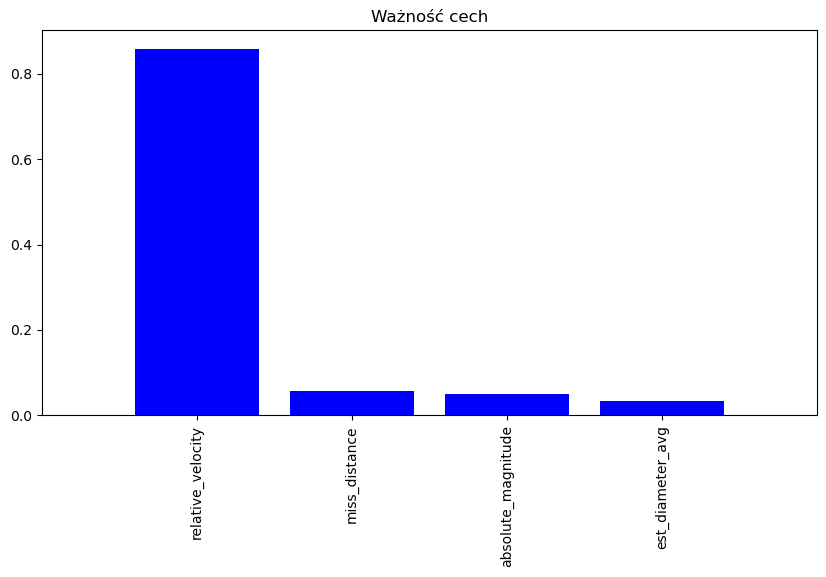

In [74]:
importances = clf_hyperopt_f1.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X.columns)
plt.figure(figsize=(10,5))
plt.title("Ważność cech")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90, fontsize=10)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# użycie hyperopta względem maksymalizacji f_beta

In [75]:
Beta = 1.05
def objective_fbeta(params):
    clf = DecisionTreeClassifier(**params, random_state=0, class_weight='balanced')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = metrics.fbeta_score(y_test, y_pred, pos_label=1, beta = Beta)
    return {'loss': -score, 'status': STATUS_OK}

In [76]:
trials = Trials()

best_fbeta = fmin(objective_fbeta, space, algo=tpe.suggest, max_evals=50, trials=trials)

100%|██████████| 50/50 [00:13<00:00,  3.82trial/s, best loss: -0.5196906248669674]


In [77]:
print("Najlepsze wyniki:", best_fbeta)

Najlepsze wyniki: {'max_depth': 46, 'min_samples_leaf': 2, 'min_samples_split': 22}


In [78]:
clf_hyperopt_fbeta = DecisionTreeClassifier(max_depth=best_fbeta['max_depth']+1, min_samples_split=best_fbeta['min_samples_split']+2, min_samples_leaf=best_fbeta['min_samples_leaf']+1, random_state=0, class_weight='balanced').fit(X_train, y_train)

In [79]:
y_pred_dtc_hyperopt_fbeta = clf_hyperopt_fbeta.predict(X_test)

In [80]:
print("Accuracy:", metrics.accuracy_score(y_test.to_numpy(), y_pred_dtc_hyperopt_fbeta))
print("Precision:", metrics.precision_score(y_test.to_numpy(), y_pred_dtc_hyperopt_fbeta))
print("Recall:", metrics.recall_score(y_test.to_numpy(), y_pred_dtc_hyperopt_fbeta))
print("F1 score:", metrics.f1_score(y_test.to_numpy(), y_pred_dtc_hyperopt_fbeta))
print("Fbeta score:", metrics.fbeta_score(y_test.to_numpy(), y_pred_dtc_hyperopt_fbeta, beta=Beta))

Accuracy: 0.8548546895640687
Precision: 0.38305555555555554
Recall: 0.7682451253481895
F1 score: 0.5112140871177016
Fbeta score: 0.5196906248669674


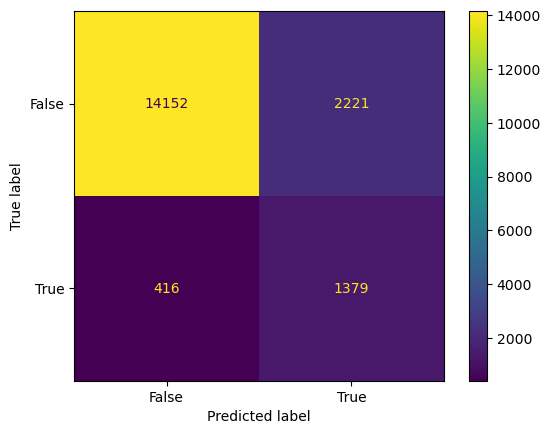

In [81]:
ConfusionMatrixDisplay.from_estimator(
    clf_hyperopt_fbeta, X_test, y_test)

In [82]:
y_score_fbeta = clf_hyperopt_fbeta.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_fbeta, pos_label=1)
roc_auc = auc(fpr, tpr)

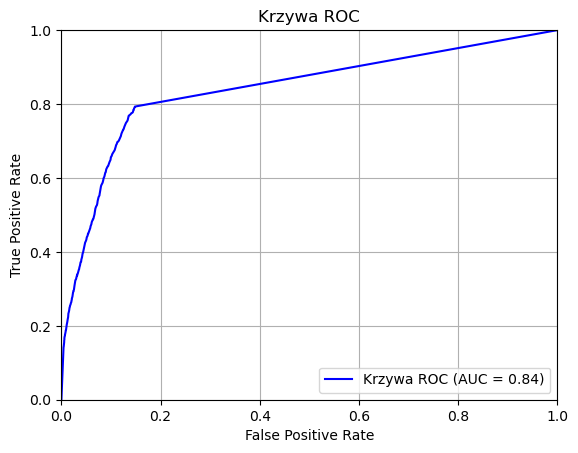

In [83]:
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

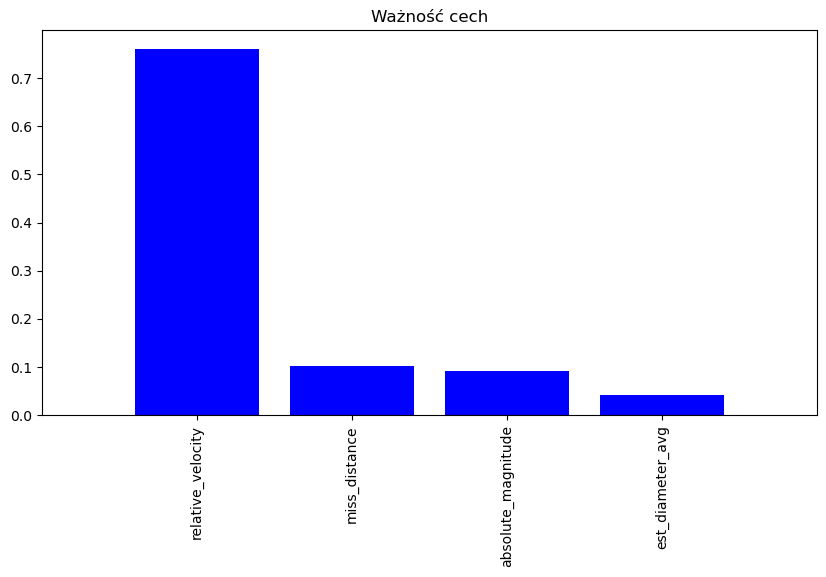

In [84]:
importances = clf_hyperopt_fbeta.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X.columns)
plt.figure(figsize=(10,5))
plt.title("Ważność cech")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90, fontsize=10)
plt.xlim([-1, X_train.shape[1]])
plt.show()